# Question 2

### Installing the python-tsp module

In [ ]:
!pip install python-tsp

## Output and Visualisations

### Initial route (Random)

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from python_tsp.heuristics import solve_tsp_simulated_annealing
import random

# Define the town names and the distance matrix
towns = [
    "Windhoek", "Swakopmund", "Walvis Bay", "Otjiwarongo", "Tsumeb",
    "Grootfontein", "Mariental", "Keetmanshoop", "Ondangwa", "Oshakati"
]

distance_matrix = np.array([
    [0, 361, 395, 249, 433, 459, 268, 497, 678, 712],
    [361, 0, 35.5, 379, 562, 589, 541, 859, 808, 779],
    [395, 35.5, 0, 413, 597, 623, 511, 732, 884, 855],
    [249, 379, 413, 0, 260, 183, 519, 768, 514, 485],
    [433, 562, 597, 260, 0, 60, 682, 921, 254, 288],
    [459, 589, 623, 183, 60, 0, 708, 947, 308, 342],
    [268, 541, 511, 519, 682, 708, 0, 231, 909, 981],
    [497, 859, 732, 768, 921, 947, 231, 0, 1175, 1210],
    [678, 808, 884, 514, 254, 308, 909, 1175, 0, 30],
    [712, 779, 855, 485, 288, 342, 981, 1210, 30, 0]
])

We are printing out the random route with a random starting point

In [245]:
# --- Initial Random Route for Comparison ---
initial_route = list(range(len(towns)))
random.shuffle(initial_route)

def calculate_distance(route):
    return sum(
        distance_matrix[route[i], route[(i + 1) % len(route)]]
        for i in range(len(route))
    )

initial_distance = calculate_distance(initial_route)

print("Initial Random Route:\n")
for i, city in enumerate(initial_route):
    print(f"{i}. {towns[city]}")
print(f"\nReturn to start: {towns[initial_route[0]]}")
print(f"\nInitial Total Distance: {initial_distance:.2f} km\n")

Initial Random Route:

0. Ondangwa
1. Windhoek
2. Otjiwarongo
3. Mariental
4. Tsumeb
5. Grootfontein
6. Walvis Bay
7. Oshakati
8. Keetmanshoop
9. Swakopmund

Return to start: Ondangwa

Initial Total Distance: 6543.00 km



### Optimized Route

In this visualisation, we are going to have a graphical representation of the optimized route. You will later see how this is much better compared to the randomised route that will be demonstrated at later stage.

Optimized Route:

0. Windhoek
1. Otjiwarongo
2. Grootfontein
3. Tsumeb
4. Ondangwa
5. Oshakati
6. Swakopmund
7. Walvis Bay
8. Keetmanshoop
9. Mariental

Return to start: Windhoek

Optimized Total Distance: 2821.50 km



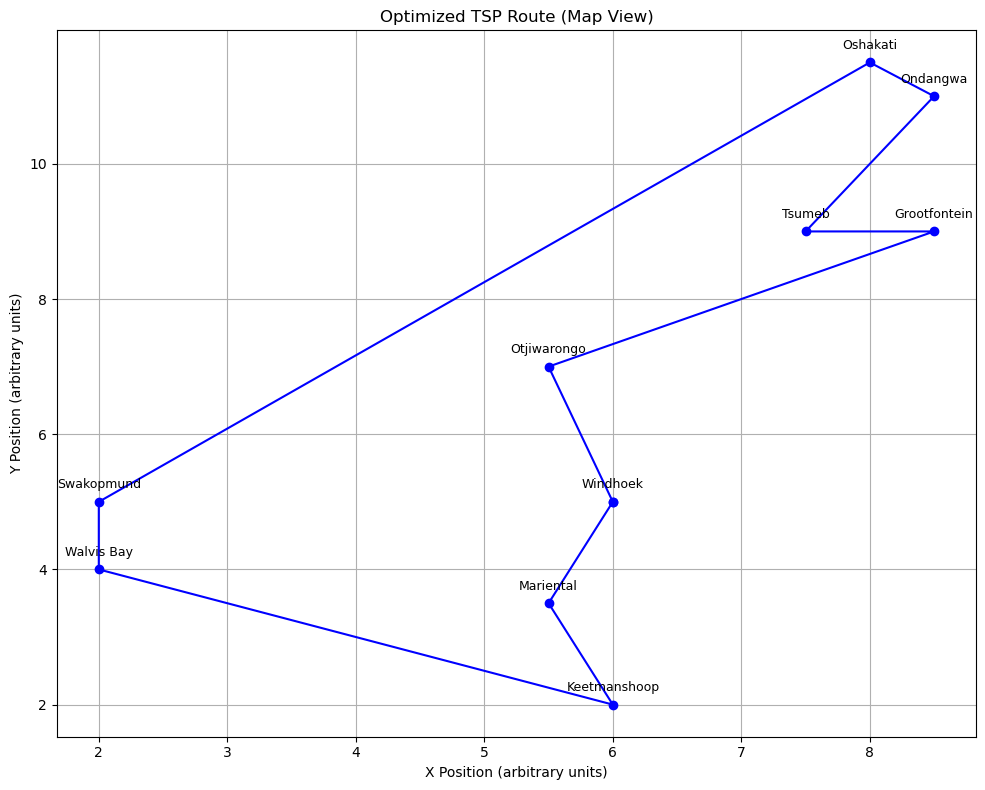

In [249]:
# Optimized Route using Simulated Annealing
Cities_index, distance = solve_tsp_simulated_annealing(distance_matrix)

print("Optimized Route:\n")
for i, city in enumerate(Cities_index):
    print(f"{i}. {towns[city]}")
print(f"\nReturn to start: {towns[Cities_index[0]]}")
print(f"\nOptimized Total Distance: {distance:.2f} km\n")

# --- Visualisation of Route on a Map-like Plot ---
optimized_coords = [positions[towns[i]] for i in Cities_index] + [positions[towns[Cities_index[0]]]]
x_vals, y_vals = zip(*optimized_coords)

plt.figure(figsize=(10, 8))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue')

for idx in Cities_index:
    x, y = positions[towns[idx]]
    plt.text(x, y + 0.2, towns[idx], fontsize=9, ha='center')

plt.title("Optimized TSP Route (Map View)")
plt.xlabel("X Position (arbitrary units)")
plt.ylabel("Y Position (arbitrary units)")
plt.grid(True)
plt.tight_layout()
plt.show()

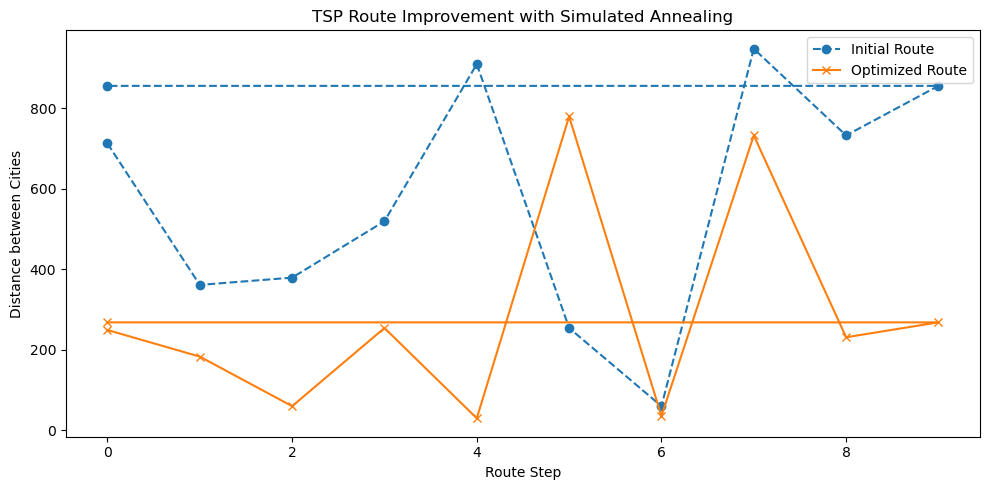

In [272]:
# Visualisation of Route Improvement
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    list(range(len(initial_route))) + [0],
    [distance_matrix[initial_route[i], initial_route[(i+1)%len(initial_route)]] for i in range(len(initial_route))] + [distance_matrix[initial_route[-1], initial_route[0]]],
    label="Initial Route",
    linestyle="--",
    marker="o"
)

ax.plot(
    list(range(len(Cities_index))) + [0],
    [distance_matrix[Cities_index[i], Cities_index[(i+1)%len(Cities_index)]] for i in range(len(Cities_index))] + [distance_matrix[Cities_index[-1], Cities_index[0]]],
    label="Optimized Route",
    linestyle="-",
    marker="x"
)

ax.set_title("TSP Route Improvement with Simulated Annealing")
ax.set_xlabel("Route Step")
ax.set_ylabel("Distance between Cities")
ax.legend()
plt.tight_layout()
plt.show()

And now in this one, we are going to see the graphical respresentation of the randomised route.
The graph shown below is a simulated map that shows what the route would look like if generated at **random**

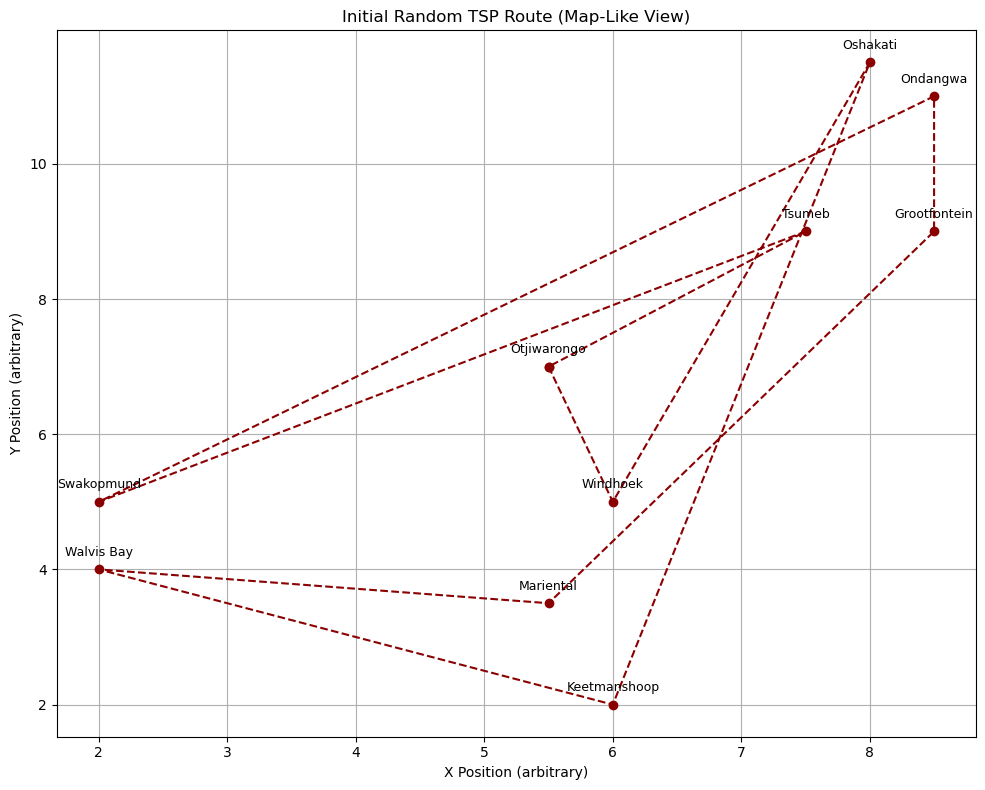

In [281]:
# Generate and evaluate initial random route
initial_route = list(range(len(towns)))
random.shuffle(initial_route)

# Plotting the route using map-like 2D positions
route_coords = [positions[towns[i]] for i in initial_route]
route_coords.append(route_coords[0])  # Return to start

x_vals, y_vals = zip(*route_coords)

plt.figure(figsize=(10, 8))
plt.plot(x_vals, y_vals, marker='o', linestyle='--', color='darkred')

# Label each city
for idx in initial_route:
    x, y = positions[towns[idx]]
    plt.text(x, y + 0.2, towns[idx], fontsize=9, ha='center')

plt.title("Initial Random TSP Route (Map-Like View)")
plt.grid(True)
plt.xlabel("X Position (arbitrary)")
plt.ylabel("Y Position (arbitrary)")
plt.tight_layout()
plt.show()


# Analysis & Evaluation

In [283]:
# Analysis & Evaluation
print("\nAnalysis & Evaluation:")
print("- The initial route was randomly chosen, with a distance of {:.2f} km.".format(initial_distance))
print("- The optimized route that was calculated via the simulated annealing reduced distance down to {:.2f} km.".format(distance))
print("- This shows how simulated annealing can escape local minima by accepting worse paths early on.")
print("- For larger sets of cities, brute-force would be not be feasible computationally, but simulated annealing remains practical.")
print("- The temperature and cooling rate can be tuned for better convergence speed vs solution quality.")



Analysis & Evaluation:
- The initial route was randomly chosen, with a distance of 6543.00 km.
- The optimized route that was calculated via the simulated annealing reduced distance down to 2821.50 km.
- This shows how simulated annealing can escape local minima by accepting worse paths early on.
- For larger sets of cities, brute-force would be not be feasible computationally, but simulated annealing remains practical.
- The temperature and cooling rate can be tuned for better convergence speed vs solution quality.
